In [1]:
import pandas as pd                       
import numpy as np                        
import matplotlib.pyplot as plt           
import seaborn as sns                     
import warnings                           
warnings.filterwarnings("ignore")
%matplotlib inline
import io
import requests

In [2]:
url1="https://raw.githubusercontent.com/aafaz/Loan-Prediction-System/master/Data/test.csv"
test = requests.get(url1).content
url2="https://raw.githubusercontent.com/aafaz/Loan-Prediction-System/master/Data/train.csv"
train = requests.get(url2).content

test= pd.read_csv(io.StringIO(test.decode('utf-8')))
train= pd.read_csv(io.StringIO(train.decode('utf-8')))

In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test.shape

(367, 12)

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.shape

(614, 13)

In [7]:
test_original= test.copy()
train_original= train.copy()

In [8]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train['Loan_Status'].value_counts()  

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

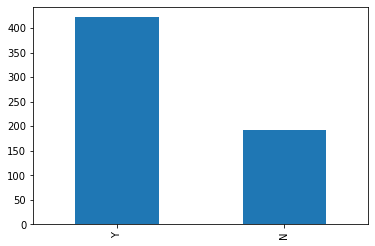

In [11]:
train['Loan_Status'].value_counts().plot.bar()   

Text(0.5, 1.0, 'Loan Status')

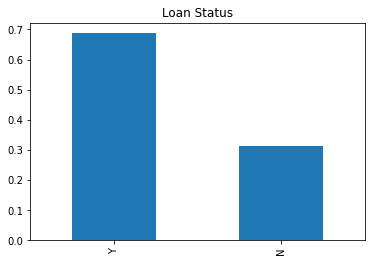

In [12]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()


plt.title("Loan Status")

<AxesSubplot:title={'center':'Credit_History'}>

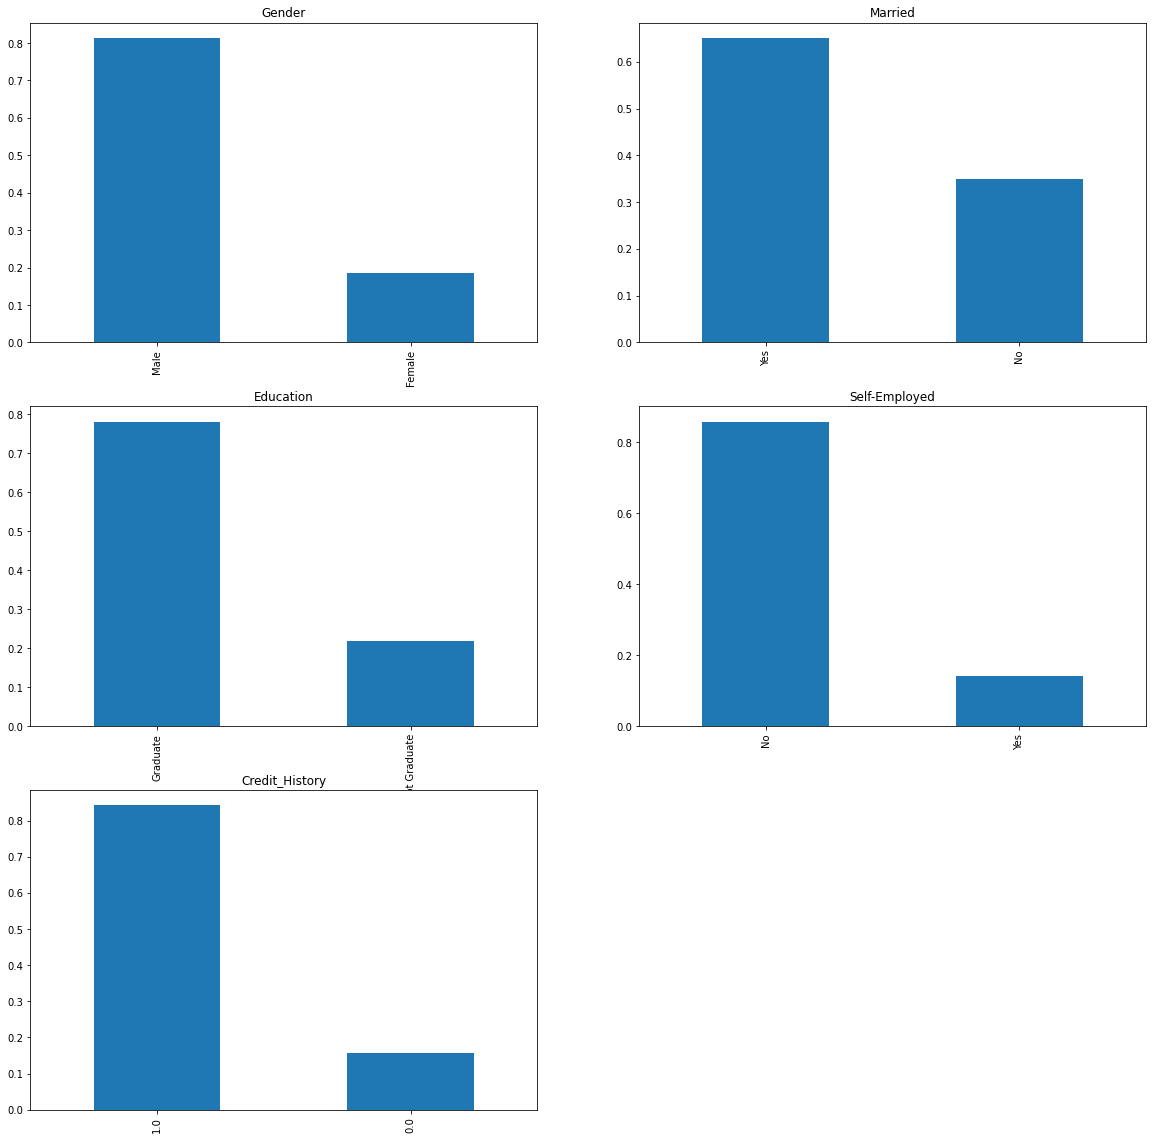

In [13]:
plt.figure()
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Gender')

plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Married')

plt.subplot(323)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Education')

plt.subplot(324)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Self-Employed')

plt.subplot(325)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,20),title='Credit_History')

<AxesSubplot:title={'center':'Property Area'}>

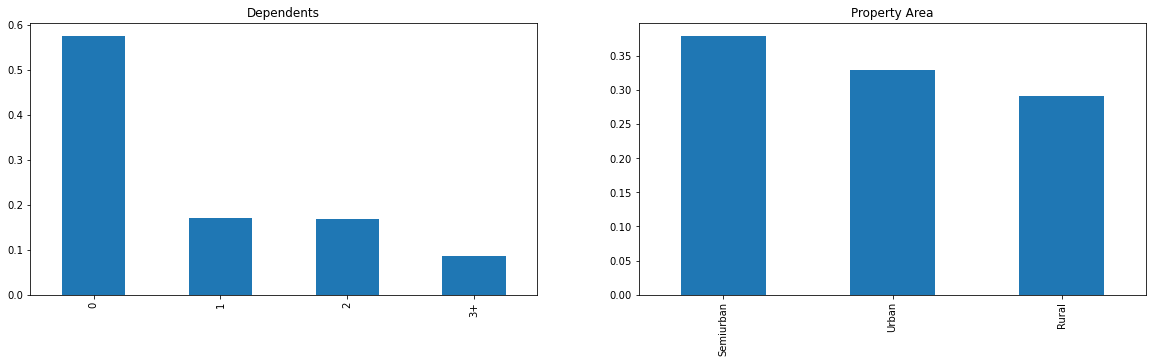

In [14]:
plt.figure()
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,5),title='Property Area')

<AxesSubplot:>

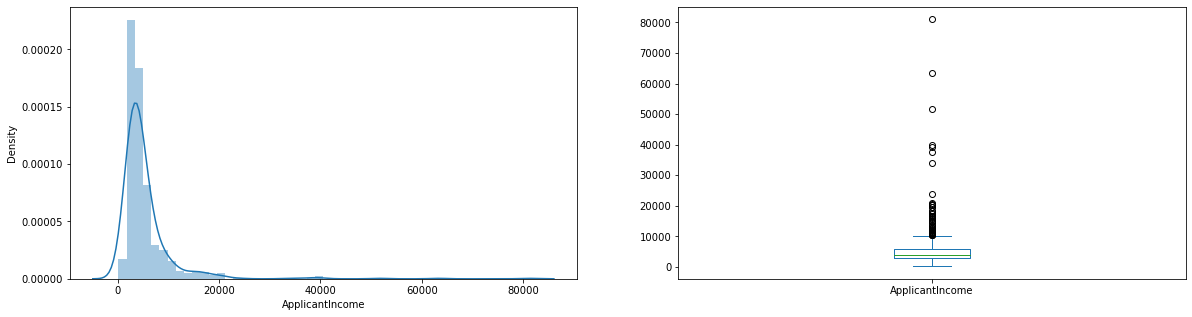

In [15]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(20,5))

Text(0.5, 0.98, '')

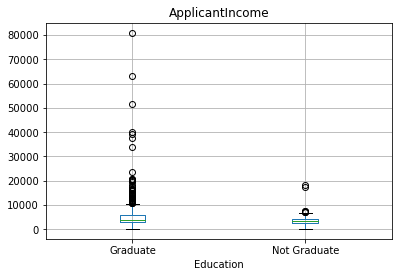

In [16]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

<AxesSubplot:>

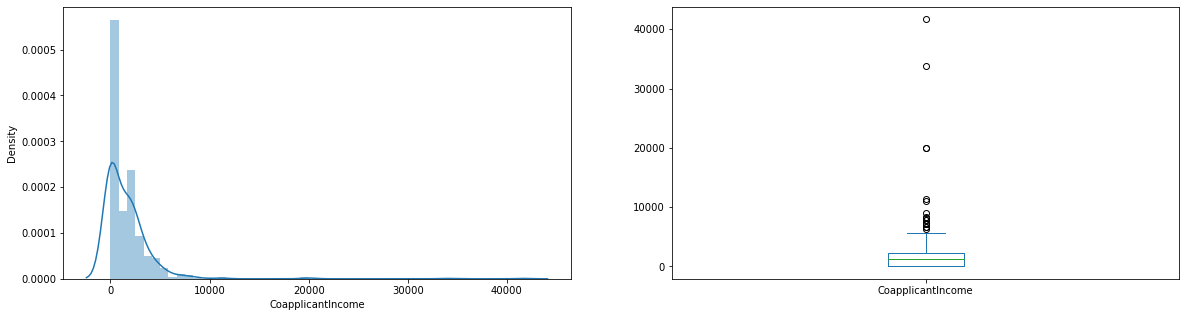

In [17]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(20,5))

<AxesSubplot:>

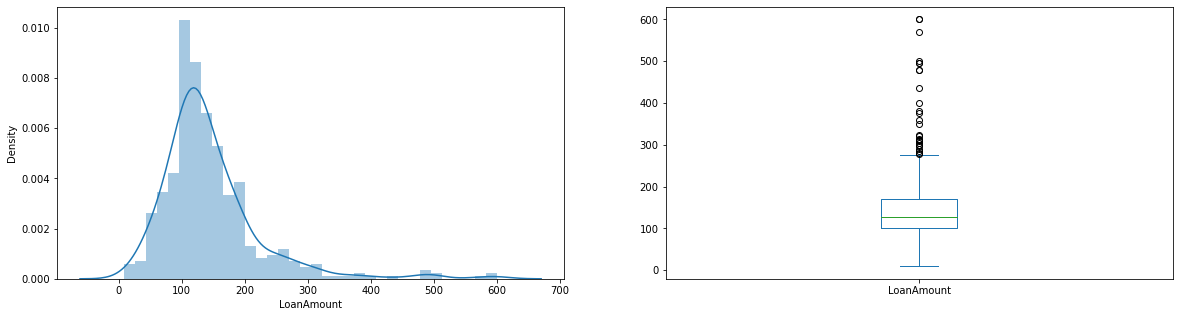

In [18]:
df=train.dropna()
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(20,5))


In [19]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

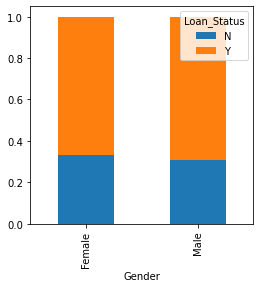

In [20]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<AxesSubplot:xlabel='Married'>

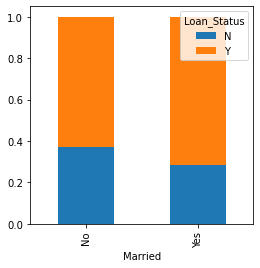

In [22]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


In [23]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


<AxesSubplot:xlabel='Dependents'>

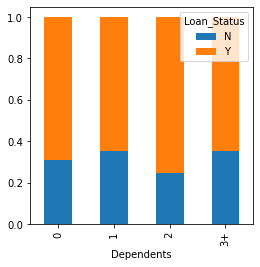

In [24]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [25]:
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<AxesSubplot:xlabel='Education'>

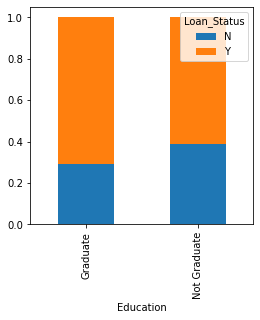

In [26]:
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4) )


In [27]:
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


<AxesSubplot:xlabel='Self_Employed'>

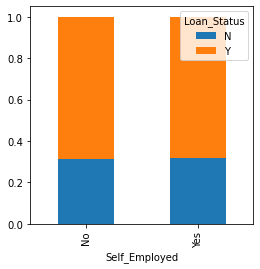

In [28]:
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


In [29]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<AxesSubplot:xlabel='Credit_History'>

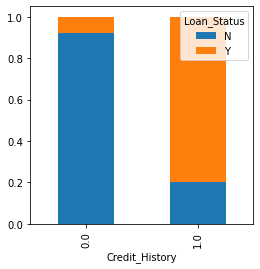

In [30]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))


In [31]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<AxesSubplot:xlabel='Property_Area'>

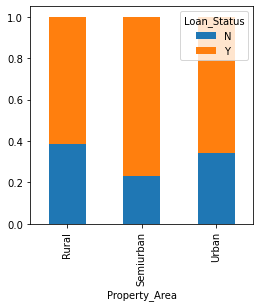

In [32]:
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(4,4))


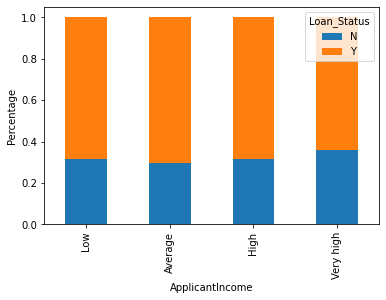

In [33]:
bins=[0,2500,4000,6000,8100] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P=plt.ylabel('Percentage')

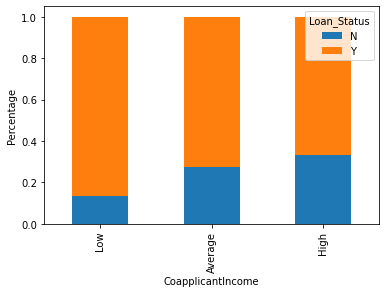

In [34]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

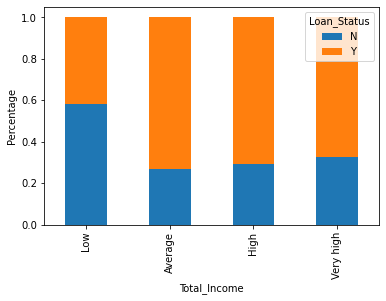

In [35]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

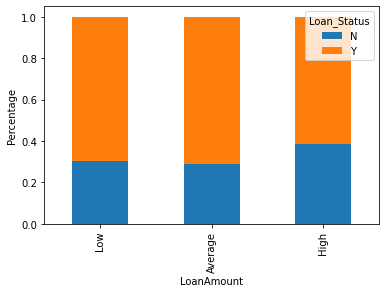

In [36]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [37]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 

In [38]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

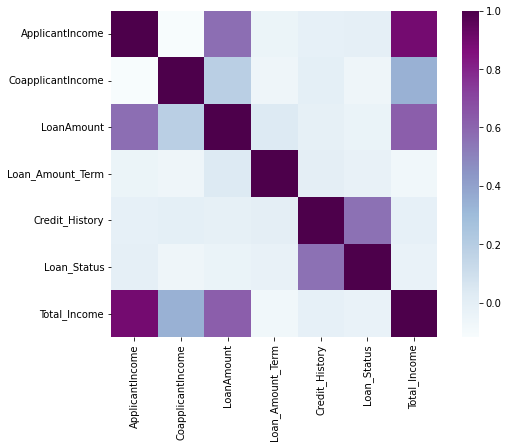

In [39]:
matrix = train.corr() 
plt.figure(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="BuPu")

In [40]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [41]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [43]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

<AxesSubplot:>

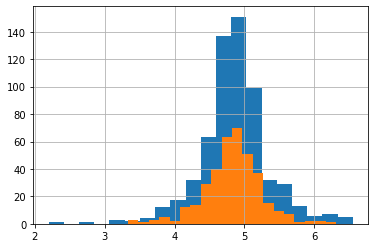

In [44]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 


test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

In [45]:
train=train.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [46]:
test=test.drop('Loan_ID',axis=1)
test.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


In [47]:
train=train.drop('Gender',axis=1)
test=test.drop('Gender',axis=1)
 
train=train.drop('Dependents',axis=1)
test=test.drop('Dependents',axis=1)
 
train=train.drop('Self_Employed',axis=1)
test=test.drop('Self_Employed',axis=1)

In [48]:
x=train.drop('Loan_Status',axis=1)
x.head()


,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [49]:
y=train['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [50]:
x=pd.get_dummies(x) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [51]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,1,0,1,0,0,0,1


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, train_size =0.75,random_state=0)

In [53]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [54]:
pred_cv = model.predict(x_cv)

In [55]:
accuracy_score(y_cv,pred_cv)

0.8376623376623377

In [56]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_cv,pred_cv)
c

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [57]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,1,0,0,1,0,0,1


In [58]:
pred_test = model.predict(test)

In [59]:
from statistics import mean 
from sklearn.model_selection import StratifiedKFold
i=1 
pred_scores=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]
    pred_scores.append(score)
print("\nMean of Accuracy Scores=",mean(pred_scores))


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7950819672131147

Mean of Accuracy Scores= 0.807796881247501


In [60]:
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.6585365853658537

2 of kfold 5
accuracy_score 0.7154471544715447

3 of kfold 5
accuracy_score 0.7235772357723578

4 of kfold 5
accuracy_score 0.7154471544715447

5 of kfold 5
accuracy_score 0.6475409836065574
